In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import warnings
import nltk
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

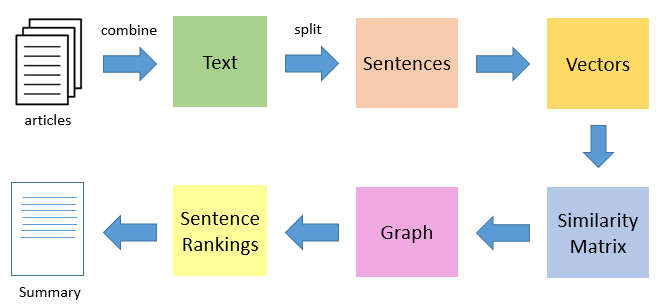

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/scisumm.csv")
data.head()

,text,summary
0,"TnT - A Statistical Part-Of-Speech Tagger Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. Contrary to claims found elsewhere in the literature, we argue that a tagger base...","TnT - A Statistical Part-Of-Speech Tagger\nTrigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.\nContrary to claims found elsewhere in the literature, we argue that a tagger ba..."
1,"Mildly Non-Projective Dependency Structures Syntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without c...","Mildly Non-Projective Dependency Structures\nSyntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without ..."
2,Using Corpus Statistics And WordNet Relations For Sense Identification Corpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition ...,Using Corpus Statistics And WordNet Relations For Sense Identification\nCorpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition...
3,"Automatic Labeling Of Semantic Roles present a system for identifying the semantic relationships, or filled by constituents of a sentence within a semantic frame. Given an input sentence and a tar...","Automatic Labeling Of Semantic Roles\nWe present a system for identifying the semantic relationships, or semantic roles, filled by constituents of a sentence within a semantic frame.\nGiven an inp..."
4,Generative Models For Statistical Parsing With Combinatory Categorial Grammar This paper compares a number of generative probability models for a widecoverage Combinatory Categorial Gram mar (CCG)...,Generative Models For Statistical Parsing With Combinatory Categorial Grammar\nThis paper compares a number of generative probability models for a wide-coverage Combinatory Categorial Grammar (CCG...


## Preprocessing

### First step we need to do is to clean the text and summary

we will need to :   

* Convert everything to lowercase
* Remove HTML tags
* Contraction mapping
* Remove (‘s)
* Remove the parenthesis ( )
* Eliminate punctuations and special characters

for that we need to define a funtion




In [ ]:
def text_cleaner(text):
  newString = text.lower()
  newString = BeautifulSoup(newString, "lxml").text
  newString = newString.replace(')', '')
  newString = newString.replace('(', '')
  newString = newString.replace('"','')
  newString = newString.replace(',','')
  newString = newString.replace(':','')
  newString = newString.replace('\'','')
  newString = newString.replace(' - ',' ')
  newString = newString.replace('\n',' ')
  return newString

In [ ]:
cleaned_text = [text_cleaner(text) for text in data["text"]]
cleaned_text[0]

'tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on markov models performs at least as well as other current approaches including the maximum entropy framework. a recent comparison has even shown that tnt performs significantly better for the tested corpora. we describe the basic model of tnt the techniques used for smoothing and for handling unknown words. furthermore we present evaluations on two corpora. a large number of current language processing systems use a part-of-speech tagger for pre-processing. the tagger assigns a unique or ambiguous part-ofspeech tag to each token in the input and passes its output to the next processing level usually a parser. furthermore there is a large interest in part-ofspeech tagging for corpus annotation projects who create valuable linguistic resources by a combination of automatic processing and human cor

In [ ]:
data['text'][0]

"TnT - A Statistical Part-Of-Speech Tagger Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. Contrary to claims found elsewhere in the literature, we argue that a tagger based on Markov models performs at least as well as other current approaches, including the Maximum Entropy framework. A recent comparison has even shown that TnT performs significantly better for the tested corpora. We describe the basic model of TnT, the techniques used for smoothing and for handling unknown words. Furthermore, we present evaluations on two corpora. A large number of current language processing systems use a part-of-speech tagger for pre-processing. The tagger assigns a (unique or ambiguous) part-ofspeech tag to each token in the input and passes its output to the next processing level, usually a parser. Furthermore, there is a large interest in part-ofspeech tagging for corpus annotation projects, who create valuable linguistic resources by a combination of automatic processin

In [ ]:
cleaned_summary = [text_cleaner(text) for text in data['summary']]
cleaned_summary[0]

'tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on markov models performs at least as well as other current approaches including the maximum entropy framework. a recent comparison has even shown that tnt performs significantly better for the tested corpora. we describe the basic model of tnt the techniques used for smoothing and for handling unknown words. furthermore we present evaluations on two corpora. we achieve the automated tagging of a syntactic-structure-based set of grammatical function tags including phrase-chunk and syntactic-role modifiers trained in supervised mode from a tree bank of german. '

In [ ]:
data['summary'][0]

"TnT - A Statistical Part-Of-Speech Tagger\nTrigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.\nContrary to claims found elsewhere in the literature, we argue that a tagger based on Markov models performs at least as well as other current approaches, including the Maximum Entropy framework.\nA recent comparison has even shown that TnT performs significantly better for the tested corpora.\nWe describe the basic model of TnT, the techniques used for smoothing and for handling unknown words.\nFurthermore, we present evaluations on two corpora.\nWe achieve the automated tagging of a syntactic-structure-based set of grammatical function tags including phrase-chunk and syntactic-role modifiers trained in supervised mode from a tree bank of German.\n"

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

### After we are done cleaning the text and summary, we then need to understand the distirbution of of the words in our dataset

#### Here, we will analyze the length of the reviews and the summary to get an overall idea about the distribution of length of the text.

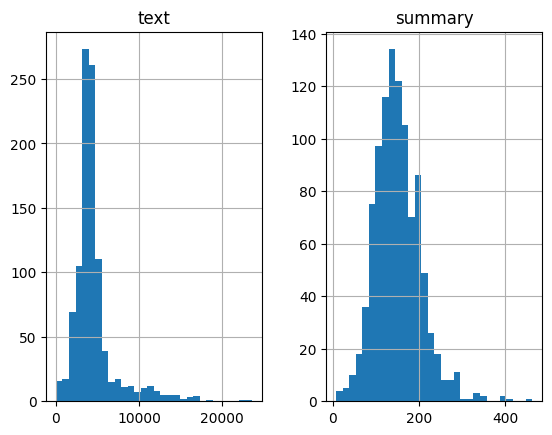

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

### we notice that number of words in the text column is extremly high, and since we will be using facebook/bart-large-cnn the maximum number of tokens allowed is 1024

In [ ]:
model_name = "facebook/bart-large-cnn"
max_token_limit = tokenizer.model_max_length
print(f"Maximum token limit for {model_name}: {max_token_limit}")

NameError: ignored

### so we need a way to fix the maximum length of the text column before fine-tuning, we will use an extractive approach of text summarization to reduce the size.
#### we will use TextRank algorithm

TextRank is an extractive and unsupervised text summarization technique. Let’s take a look at the flow of the TextRank algorithm that we will be following:


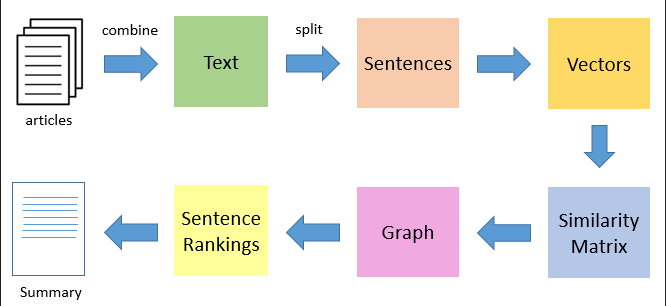

* The first step would be to concatenate all the text contained in the articles
* Then split the text into individual sentences
* In the next step, we will find vector representation (word embeddings) for each *and every sentence
* Similarities between sentence vectors are then calculated and stored in a matrix
* The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation
* Finally, a certain number of top-ranked sentences form the final summary

In [ ]:
from nltk.tokenize import sent_tokenize

# split the the text in the articles into sentences
texts = []
for s in data['cleaned_text']:
  texts.append(sent_tokenize(s))

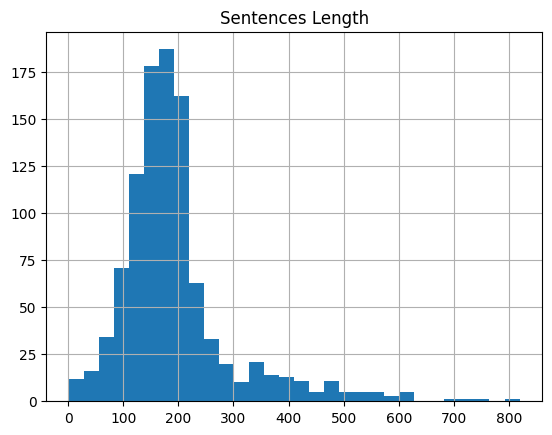

In [ ]:
sentences_count = []

# populate the lists with lengths of sentences
for i in texts:
      sentences_count.append(len(i))

length_df = pd.DataFrame({'Sentences Length':sentences_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
max(sentences_count)

819

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def sentence_similarity(sent1,sent2,embed):
    A = embed([sent1])[0]
    B = embed([sent2])[0]
    return 1 - (np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B)))

In [ ]:
def build_similarity_matrix(sentences,embeds):
    similarity_matrix = np.zeros((len(sentences),len(sentences)))
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1],sentences[idx2],embeds)
    return similarity_matrix

In [ ]:
def generate_summary(sentences, embeds, percentile=10):
    top_n = int(len(sentences) * (percentile / 100))
    summarize_text = []
    sentence_similarity_matrix = build_similarity_matrix(sentences,embeds)
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])
    return summarize_text

In [ ]:
from time import time
text_10_sent = [] # 10% of the text
text_20_sent = [] # 20% of the text

for t in texts:
    text_10_sent.append(generate_summary(t, percentile=10, embeds=embed))
    text_20_sent.append(generate_summary(t, percentile=20, embeds=embed))

text_10 = []
text_20 = []

for i in range(len(text_10_sent)):
    text_10.append(' '.join(text_10_sent[i]))
    text_20.append(' '.join(text_20_sent[i]))


data["text_10"] = text_10
data["text_20"] = text_20

data.head()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
### the previous is good but is not well optimized it takes too much time to generate a summary

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-12-20 10:54:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-20 10:54:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-20 10:54:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()


In [ ]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

def rank_sentences(text):
    sentence_vector = []
    for i in text:
        if len(i) != 0:
            # arr = []
            # for w in i.split():
            #     arr.append(word_embeddings.get(w, np.zeros((50,))))
            # v = sum(arr) / (len(i.split()))
            v = np.sum([word_embeddings.get(w, np.zeros((50,))) for w in i.split()])/(len(i.split())+0.001)
        else:
            v = np.zeros((50,))
            # print(arr)
        sentence_vector.append(v)

    sim_mat = np.zeros([len(text), len(text)])
    for i in range(len(text)):
        for j in range(len(text)):
            if i != j:
                if type(sentence_vector[i]) is float or type(sentence_vector[j]) is float:
                    continue
                if sentence_vector[i].shape == () or sentence_vector[j].shape == ():
                    continue
                sim_mat[i][j] = cosine_similarity(sentence_vector[i].reshape(1,50), sentence_vector[j].reshape(1,50))[0,0]

    nx_graph = nx.from_numpy_array(sim_mat)
    scores = nx.pagerank(nx_graph)
    return sorted(((scores[i],s) for i,s in enumerate(text)), reverse=True)


In [ ]:
 # Specify number of sentences to form the summary
sn = 10

# Generate summary
summary = rank_sentences(texts[0])
print("____________________________________")
for i in range(sn):
  print(summary[i][1])
print("____________________________________")
print(data["summary"][0])

____________________________________
words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g.
without this subtraction the model would overfit the training data and would generally yield worse results.
while the viterbi algorithm is guaranteed to find the sequence of states with the highest probability this is no longer true when beam search is added.
we use the wall street journal as contained in the penn treebank for our experiments.
we use the longest suffix that we can find in the training set i.e.
we use the context-independent variant of linear interpolation i.e.
we use flags ci that are true if wi is a capitalized word and false otherwise.
we set for all i = 0 ... m — 1 using a tagset of s tags and the average 11 this usually yields values in the range 003 ... 0.10.
we maintain two different suffix tries depending on the capitalization of the word.
we have shown that a tagger based on markov models yields state-of-the-

## Next step is to generate our new dataset with more summarized text

In [ ]:

# this function receives a list of tokenized text and returns the summary
def summarize_text(text, percentile=10):
    n = int(len(text) * (percentile / 100))
    s = []
    gen_sum = rank_sentences(text)
    for i in range(n):
        s.append(gen_sum[i][1])
    return s

In [ ]:
from time import time
text_10_sent = [] # 10% of the text
text_20_sent = [] # 20% of the text
counter = 0
start = time()
for t in texts:
    counter += 1
    text_10_sent.append(summarize_text(t, 10))
    text_20_sent.append(summarize_text(t, 20))
print("number of documents :", counter , " took ", ((time() - start) / 60))

text_10 = []
text_20 = []

for i in range(len(text_10_sent)):
    text_10.append(' '.join(text_10_sent[i]))
    text_20.append(' '.join(text_20_sent[i]))


data["text_10"] = text_10
data["text_20"] = text_20

data.head()

number of documents : 1009  took  0.945528221130371


,text,summary,cleaned_text,cleaned_summary,text_10,text_20
0,"TnT - A Statistical Part-Of-Speech Tagger Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. Contrary to claims found elsewhere in the literature, we argue that a tagger base...","TnT - A Statistical Part-Of-Speech Tagger\nTrigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.\nContrary to claims found elsewhere in the literature, we argue that a tagger ba...",tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on ma...,tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on ma...,words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g. without this subtraction the model would overfit the training data and would g...,words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g. without this subtraction the model would overfit the training data and would g...
1,"Mildly Non-Projective Dependency Structures Syntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without c...","Mildly Non-Projective Dependency Structures\nSyntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without ...",mildly non-projective dependency structures syntactic parsing requires a fine balance between expressivity and complexity so that naturally occurring structures can be accurately parsed without co...,mildly non-projective dependency structures syntactic parsing requires a fine balance between expressivity and complexity so that naturally occurring structures can be accurately parsed without co...,yli-jyrä 2003 proposes multiplanarity as a generalization of planarity suitable for modelling dependency analyses and evaluates it experimentally using data from ddt. while this constraint guarant...,yli-jyrä 2003 proposes multiplanarity as a generalization of planarity suitable for modelling dependency analyses and evaluates it experimentally using data from ddt. while this constraint guarant...
2,Using Corpus Statistics And WordNet Relations For Sense Identification Corpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition ...,Using Corpus Statistics And WordNet Relations For Sense Identification\nCorpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition...,using corpus statistics and wordnet relations for sense identification corpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition ...,using corpus statistics and wordnet relations for sense identification corpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition ...,• • s is difficult to estimate because of the sparse data problem but if we assume as is often done that the occurrence of each cue is independent of the others then this term can be replaced with...,• • s is difficult to estimate because of the sparse data problem but if we assume as is often done that the occurrence of each cue is independent of the others then this term can be replaced with...
3,"Automatic Labeling Of Semantic Roles present a system for identifying the semantic relationships, or filled by constituents of a sentence within a semantic frame. Given an input sentence and a tar...","Automatic Labeling Of Semantic Roles\nWe present a system for identifying the semantic relationships, or semantic roles, f

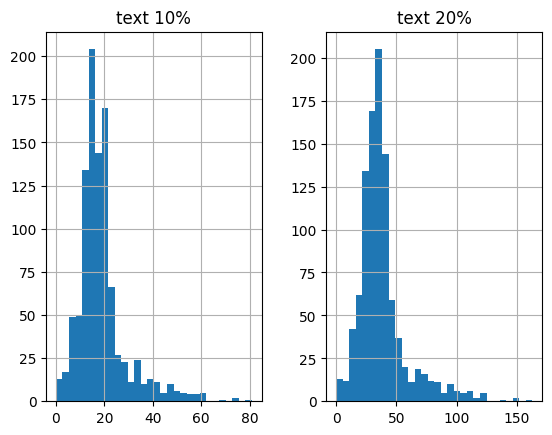

In [ ]:
sentences_count_10 = []
sentences_count_20 = []

# populate the lists with lengths of sentences
for i in text_10_sent:
      sentences_count_10.append(len(i))
for i in text_20_sent:
      sentences_count_20.append(len(i))

length_df = pd.DataFrame({'text 10%':sentences_count_10, 'text 20%':sentences_count_20})
length_df.hist(bins = 30)
plt.show()

### Next we save the new dataset

## we can also use in-built libraries in python like Sumy

In [ ]:
!pip install sumy==0.11.0

In [ ]:
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [ ]:
def summarize_text_sumy(text, percentile=10):
    num_sent = len(sent_tokenize(text))
    n = int(num_sent * (percentile / 100))
    s = ''
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()

    summary = summarizer(parser.document, n)

    for sentence in summary:
        s = s + ' ' + str(sentence)
    return s

In [ ]:
summarize_text_sumy(data["cleaned_text"][0])

' we describe the basic model of tnt the techniques used for smoothing and for handling unknown words. this tagger tnt not only yielded the highest accuracy it also was the fastest both in training and tagging. additionally we present results of the tagger on the negra corpus brants et al. 1999 and the penn treebank marcus et al. 1993. the penn treebank results reported here for the markov model approach are at least equivalent to those reported for the maximum entropy approach in ratnaparkhi 1996. for a comparison to other taggers the reader is referred to zavrel and daelemans 1999. tnt uses second order markov models for part-ofspeech tagging. as a first step we use the maximum likelihood probabilities p which are derived from the relative frequencies for all t1 t2 t3 in the tagset and w3 in the lexicon. therefore we estimate a trigram probability as follows p are maximum likelihood estimates of the probabilities and a1 + a2 ± a3 = 1 so p again represent probability distributions. th

In [ ]:
text_sumy_10 = []
text_sumy_20 = []
counter = 0
for t in data["cleaned_text"]:
    counter += 1
    start = time()
    text_sumy_10.append(summarize_text_sumy(t, 10))
    text_sumy_20.append(summarize_text_sumy(t, 20))
print("number of documents :", counter , "took", time() - start, 'seconds')


number of documents : 1009 took 0.7417623996734619 seconds


In [ ]:
data.head(2)

,text,summary,cleaned_text,cleaned_summary,text_10,text_20,text_sumy_10,text_sumy_20,blue_scores_10,blue_scores_sumy,sim_scores_10,sim_scores_sumy
0,"TnT - A Statistical Part-Of-Speech Tagger Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. Contrary to claims found elsewhere in the literature, we argue that a tagger base...","TnT - A Statistical Part-Of-Speech Tagger\nTrigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.\nContrary to claims found elsewhere in the literature, we argue that a tagger ba...",tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on ma...,tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on ma...,words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g. without this subtraction the model would overfit the training data and would g...,words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g. without this subtraction the model would overfit the training data and would g...,we describe the basic model of tnt the techniques used for smoothing and for handling unknown words. this tagger tnt not only yielded the highest accuracy it also was the fastest both in training...,we describe the basic model of tnt the techniques used for smoothing and for handling unknown words. this tagger tnt not only yielded the highest accuracy it also was the fastest both in training...,0.254836,0.282592,0.376645,0.340122
1,"Mildly Non-Projective Dependency Structures Syntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without c...","Mildly Non-Projective Dependency Structures\nSyntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without ...",mildly non-projective dependency structures syntactic parsing requires a fine balance between expressivity and complexity so that naturally occurring structures can be accurately parsed without co...,mildly non-projective dependency structures syntactic parsing requires a fine balance between expressivity and complexity so that naturally occurring structures can be accurately parsed without co...,yli-jyrä 2003 proposes multiplanarity as a generalization of planarity suitable for modelling dependency analyses and evaluates it experimentally using data from ddt. while this constraint guarant...,yli-jyrä 2003 proposes multiplanarity as a generalization of planarity suitable for modelling dependency analyses and evaluates it experimentally using data from ddt. while this constraint guarant...,although such a definition can be useful we do not follow it here since it obscures the distinction between projectivity and planarity to be discussed in section 3. in contrast to acyclicity and ...,although such a definition can be useful we do not follow it here since it obscures the distinction between projectivity and planarity to be discussed in section 3. in contrast to acyclicity and ...,0.364817,0.231453,0.366517,0.528158


In [ ]:
data["text_sumy_10"] = text_sumy_10
data["text_sumy_20"] = text_sumy_20

In [ ]:
data.to_csv("/content/drive/MyDrive/Data/scisumm_new.csv")

In [ ]:
data["text_sumy_20"][1]

' in dependency-based parsing several constraints have been proposed that restrict the class of permissible structures such as projectivity planarity multi-planarity well-nestedness gap degree and edge degree. dependency-based representations have become increasingly popular in syntactic parsing especially for languages that exhibit free or flexible word order such as czech collins et al. 1999 bulgarian marinov and nivre 2005 and turkish eryi˘git and oflazer 2006. many practical implementations of dependency parsing are restricted to projective structures where the projection of a head word has to form a continuous substring of the sentence. in this paper we review a number of proposals for classes of dependency structures that lie between strictly projective and completely unrestricted non-projective structures. in section 3 we define and compare five different constraints on mildly non-projective dependency structures that can be found in the literature planarity multiplanarity well-

In [ ]:
import pandas as pd
import nltk
data = pd.read_csv("/content/drive/MyDrive/Data/scisumm_new.csv")

# Validation

There are Multiple ways we can compare two sentences to compute accuracy

 * N-Grams/Bleu Score : Mostly used in Translation
 * Similarity Score for Computing similarity from two sentences : Used mostly for Summary comparision or similar word/sentence Search.

In our case 2nd option is best but we will implement both cases and see the difference of scores.

In [ ]:
hypothesis = data["text_10"][0]
reference = data["summary"][0]
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(f"BLEUscore : {BLEUscore}")

BLEUscore : 0.2548361195323964


In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def sentence_similarity(sent1,sent2,embed):
    A = embed([sent1])[0]
    B = embed([sent2])[0]
    return 1 - (np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B)))

In [ ]:
print(f"Senetence Similarity Score : {sentence_similarity(s, reference, embed)}")

Senetence Similarity Score : 0.6072643101215363


## graphing the scores

I will be comparing the new summarized texts with the existing summary

In [ ]:
# BLUE SCORE
# comparing our summarized text with the original summary
data["blue_scores_10"] = data.apply(lambda row : nltk.translate.bleu_score.sentence_bleu([row["summary"]], row["text_10"]), axis=1)
# comparing our summarized text (sumy) with the original summary
data["blue_scores_sumy"] = data.apply(lambda row : nltk.translate.bleu_score.sentence_bleu([row["summary"]], row["text_sumy_10"]), axis=1)   # comparing our summarized text (sumy) with the original summary
# SIMILARITY SCORE
# comparing summarized text with original summary
data["sim_scores_10"] = data.apply(lambda row : sentence_similarity(row['summary'], row['text_10'], embed), axis=1)                          # comparing summarized text with original summary
# comparing summarized text (sumy) with original summary
data["sim_scores_sumy"] = data.apply(lambda row : sentence_similarity(row['summary'], row['text_sumy_10'], embed), axis=1)                   # comparing summarized text (sumy) with original summary
data.head()

,text,summary,cleaned_text,cleaned_summary,text_10,text_20,text_sumy_10,text_sumy_20,blue_scores_10,blue_scores_sumy,sim_scores_10,sim_scores_sumy
0,"TnT - A Statistical Part-Of-Speech Tagger Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. Contrary to claims found elsewhere in the literature, we argue that a tagger base...","TnT - A Statistical Part-Of-Speech Tagger\nTrigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.\nContrary to claims found elsewhere in the literature, we argue that a tagger ba...",tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on ma...,tnt a statistical part-of-speech tagger trigramsntags tnt is an efficient statistical part-of-speech tagger. contrary to claims found elsewhere in the literature we argue that a tagger based on ma...,words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g. without this subtraction the model would overfit the training data and would g...,words in the wall street journal part of the penn treebank ending in able are adjectives .11 in 98% of the cases e.g. without this subtraction the model would overfit the training data and would g...,we describe the basic model of tnt the techniques used for smoothing and for handling unknown words. this tagger tnt not only yielded the highest accuracy it also was the fastest both in training...,contrary to claims found elsewhere in the literature we argue that a tagger based on markov models performs at least as well as other current approaches including the maximum entropy framework. w...,0.254836,0.197366,0.376645,0.373237
1,"Mildly Non-Projective Dependency Structures Syntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without c...","Mildly Non-Projective Dependency Structures\nSyntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without ...",mildly non-projective dependency structures syntactic parsing requires a fine balance between expressivity and complexity so that naturally occurring structures can be accurately parsed without co...,mildly non-projective dependency structures syntactic parsing requires a fine balance between expressivity and complexity so that naturally occurring structures can be accurately parsed without co...,yli-jyrä 2003 proposes multiplanarity as a generalization of planarity suitable for modelling dependency analyses and evaluates it experimentally using data from ddt. while this constraint guarant...,yli-jyrä 2003 proposes multiplanarity as a generalization of planarity suitable for modelling dependency analyses and evaluates it experimentally using data from ddt. while this constraint guarant...,although such a definition can be useful we do not follow it here since it obscures the distinction between projectivity and planarity to be discussed in section 3. in contrast to acyclicity and ...,in dependency-based parsing several constraints have been proposed that restrict the class of permissible structures such as projectivity planarity multi-planarity well-nestedness gap degree and ...,0.364817,0.214442,0.366517,0.512461
2,Using Corpus Statistics And WordNet Relations For Sense Identification Corpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition ...,Using Corpus Statistics And WordNet Relations For Sense Identification\nCorpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition...,using corpus statistics and wordnet relations for sense identification corpus-based approaches to word sense identification have flexibility and generality but suffer from

In [ ]:
data.describe()

,blue_scores_10,blue_scores_sumy,sim_scores_10,sim_scores_sumy
count,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.295397,0.220965,0.337154,0.326027
std,0.113698,0.099303,0.111104,0.115872
min,0.000000,0.000000,0.119883,0.097837
25%,0.216771,0.154996,0.263778,0.249041
50%,0.290656,0.209195,0.318676,0.308840
75%,0.364381,0.269378,0.386095,0.371483
max,0.638841,0.665368,1.004896,1.004896


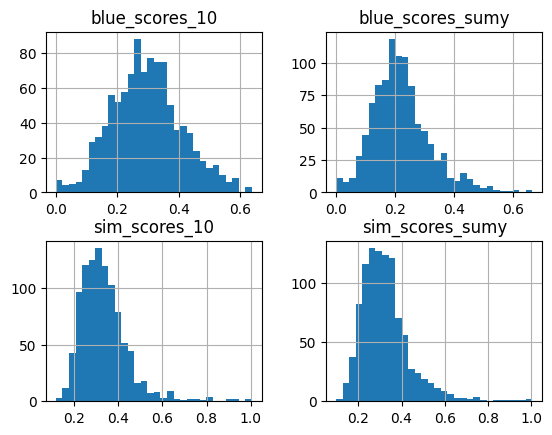

In [ ]:
scores_df = data[["blue_scores_10", 'blue_scores_sumy', 'sim_scores_10','sim_scores_sumy']]
scores_df.hist(bins = 30)
plt.show()

# _ __ __ _ _  _ __ _ __ _ _ __ _ __ _ __ _ _ _ _ __ __ _ _ _ _ __ _ _
